# 1. Analyze the data using the same techniques as for the last assignment.
Decide for yourself which and how to use the specific commands. Answer
the following questions in the report and include figures supporting your
answers:

In [133]:
import pandas as pd

df = pd.read_csv('iris.csv')

## 1.3. Which classes exist? Are they (roughly) balanced?

In [134]:
name_df = df.groupby('Name').size().to_frame('count')
name_df['ratio'] = name_df['count'] / name_df['count'].min()
name_df = name_df.sort_values('ratio')
print(name_df)

                 count  ratio
Name                         
Iris-setosa         50    1.0
Iris-versicolor     50    1.0
Iris-virginica      50    1.0


In [135]:
[name for name in df['Name'].unique()]

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

The classes are perfectly balanced with 50 entries for each.

## 1.2. Which noteworthy trends of features and relations between features as well as features and Classes do you see?

In [136]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.05, 'Correlation Matrix')

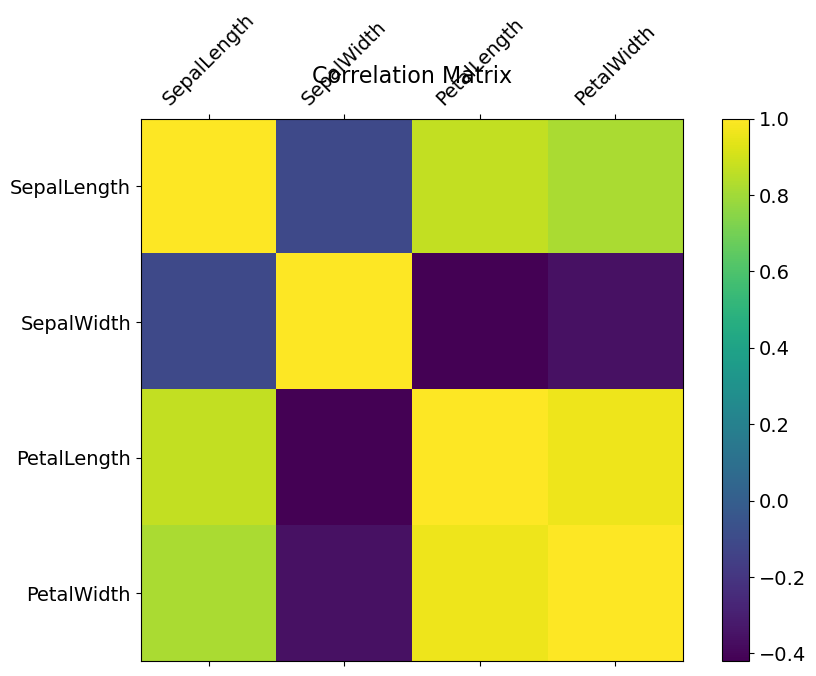

In [137]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10, 7))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

PetalLength to PetalWidth have a strong correlation.

## 1.3. If you would need to distinguish the classes with those features, which features would you choose, any why?

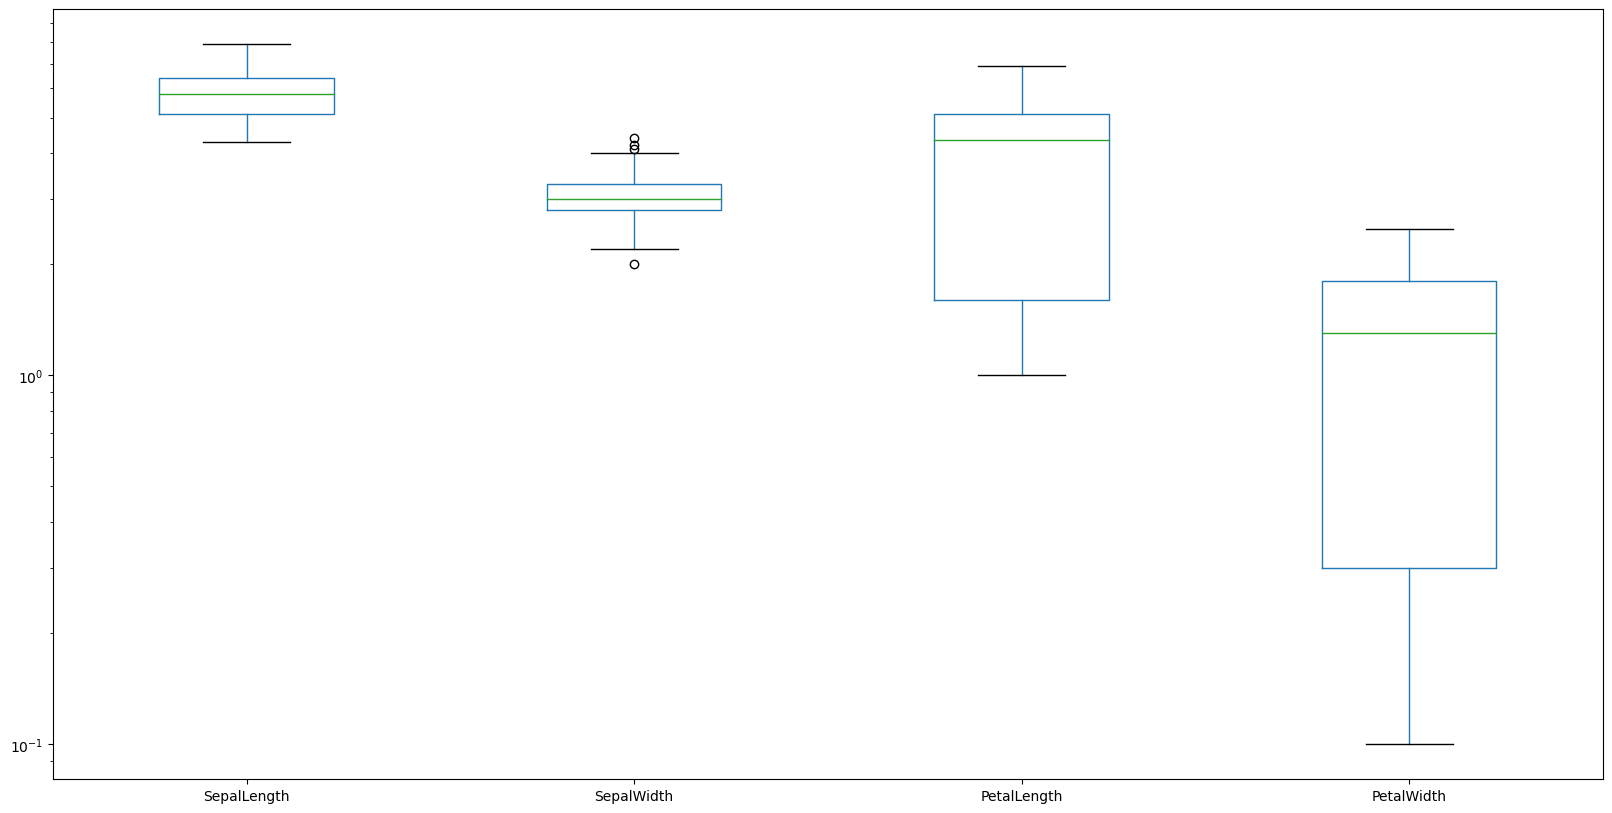

In [138]:
df.plot.box(by="Name", figsize=(20,10), logy=True, layout=(2,4))

The classes can be distinguished very well with the PetalLength and PetalWidth class, at least when you want  to separate setosa and the other classes. For versicolor and virginica multiple features like PetalLength, PetalWidth and SepalLength are probably necessary.

# 2. In order to classify the three different Iris plant species, set up your first ML toolchain including the following steps:
• Data and Feature Preprocessing (if necessary and applicable)

## 2.1. Are there any outliers in the data which might need to be removed?

No, all values are already filled, otherwise average could be used or the row completely removed.

In [139]:
# TODO https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
print('SepalLength:', df["SepalLength"].quantile(0.01), df["SepalLength"].quantile(0.99))
print('SepalWidth:', df["SepalWidth"].quantile(0.01), df["SepalWidth"].quantile(0.99))
print('PetalLength:', df["PetalLength"].quantile(0.01), df["PetalLength"].quantile(0.99))
print('PetalWidth:', df["PetalWidth"].quantile(0.01), df["PetalWidth"].quantile(0.99))
df[(df["SepalLength"] < df["SepalLength"].quantile(0.01)) | (df["SepalLength"] > df["SepalLength"].quantile(0.99))]

SepalLength: 4.4 7.7
SepalWidth: 2.2 4.150999999999999
PetalLength: 1.149 6.7
PetalWidth: 0.1 2.5


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
13,4.3,3.0,1.1,0.1,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica


## 2.3. Do you need to apply any feature preprocessing steps? (e.g Normalization, Feature Deletion/Reduction/Addition)

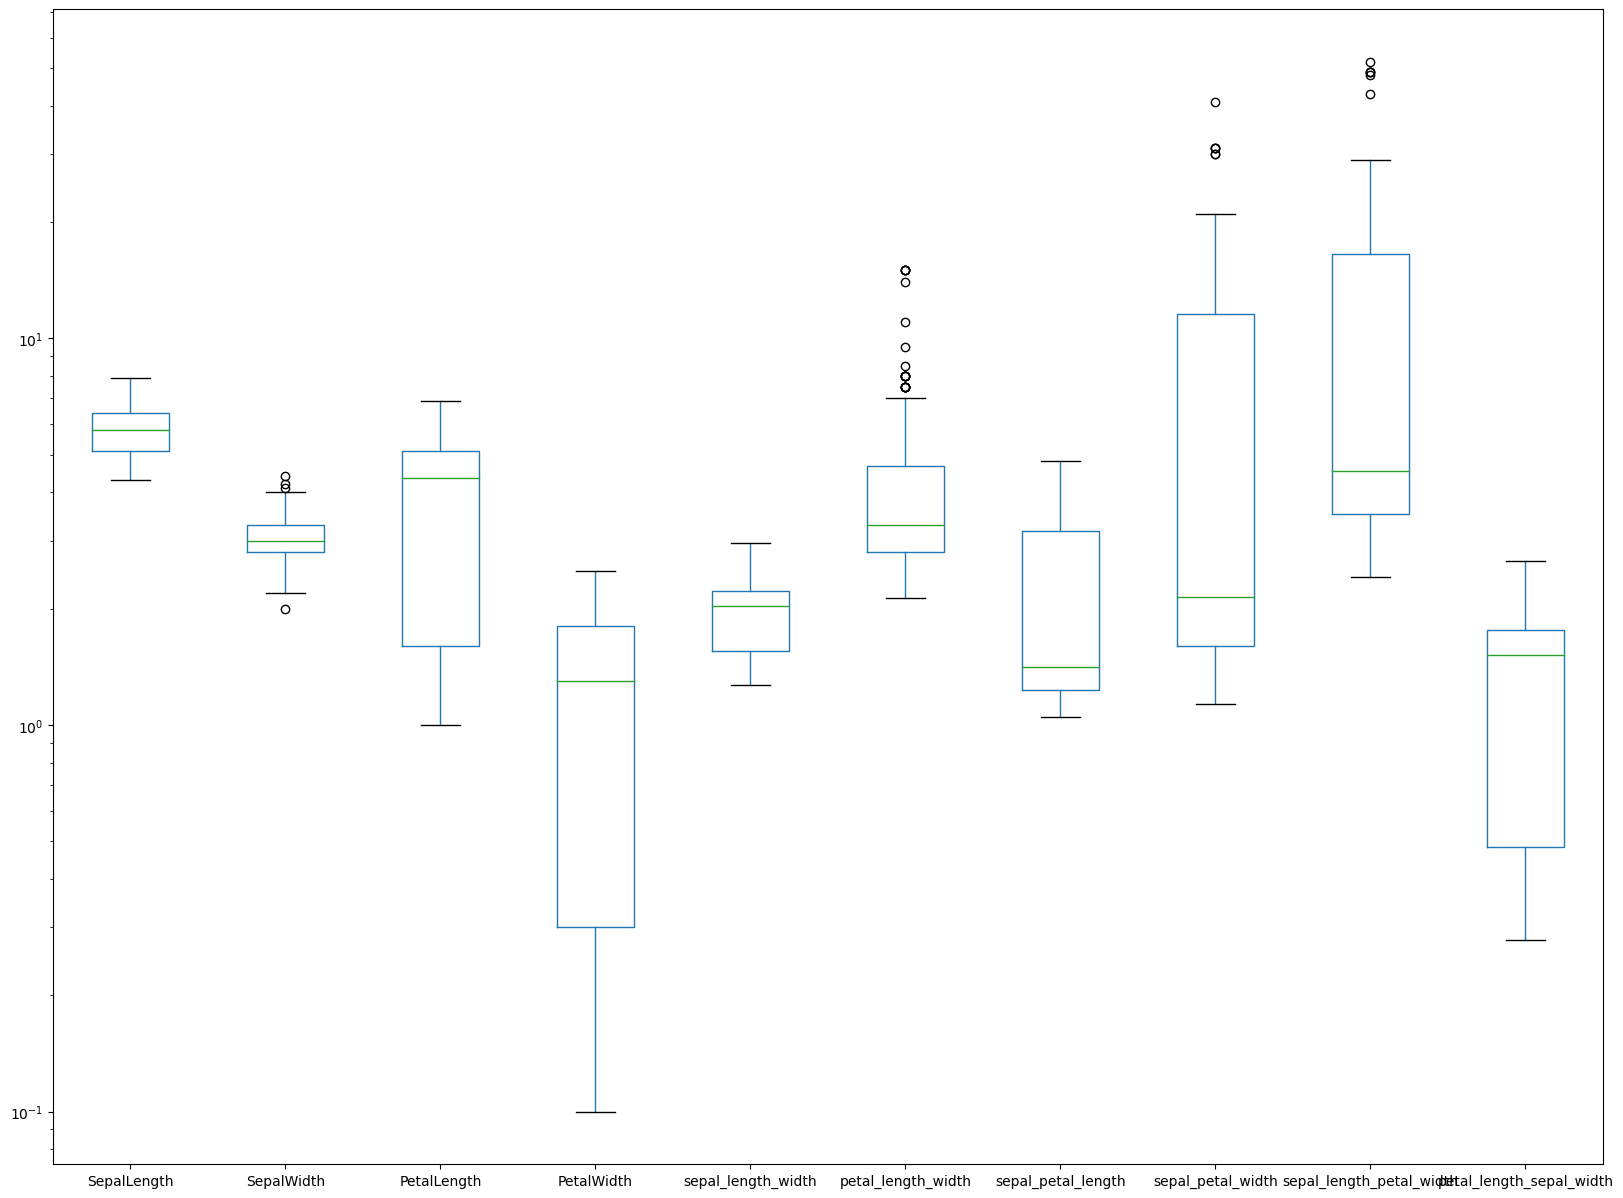

In [140]:
import numpy as np
df['sepal_length_width'] = np.divide(df['SepalLength'], df['SepalWidth'])
df['petal_length_width'] = np.divide(df['PetalLength'], df['PetalWidth'])
df['sepal_petal_length'] = np.divide(df['SepalLength'], df['PetalLength'])
df['sepal_petal_width'] = np.divide(df['SepalWidth'], df['PetalWidth'])
df['sepal_length_petal_width'] = np.divide(df['SepalLength'], df['PetalWidth'])
df['petal_length_sepal_width'] = np.divide(df['PetalLength'], df['SepalWidth'])
df.head()
df.plot.box(by="Name", figsize=(20,15), logy=True, layout=(3,4))

## 2.4. Are there any categorical features that need to be transformed so that it can be used for classification task?

## 2.5. Do you think it makes sense to derive any more features from the given ones? Why/why not?

# 3. Split up the dataset into a training and a separate held back test set in a clever way

In [141]:
import numpy as np
from sklearn.model_selection import train_test_split

y = df['Name']
X = df.drop('Name',axis=1)
#X = df

# splitting the dataframe into train and test sets
X_train,X_test,y_train,y_test = train_test_split(
  X,y,test_size=0.3,random_state=57,stratify=df['Name']) # 0.1 and 101 results in 100%

#print(X_test)
#print(y_test)

## 3.1. Why is such a train/test split important?

## 3.2. Which train/test split percentage do you choose and why?

## 3.3. Think about how can you make sure to include samples from all three classes in both datasets and why this is important.

# 4. Train different classification models to distinguish between the three
Iris Plant Species:
– Use the following models: k Nearest Neighbour, Decision Tree,
Support Vector Machine

In [142]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(1, 10):
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train, y_train)
  print("Accuracy with k=" + str(n) + " " + str(neigh.score(X_test, y_test)))
#print(y_test)

#print(neigh.predict_proba(X_test[0]))

Accuracy with k=1 0.9777777777777777
Accuracy with k=2 0.9555555555555556
Accuracy with k=3 0.9555555555555556
Accuracy with k=4 1.0
Accuracy with k=5 0.9777777777777777
Accuracy with k=6 0.9555555555555556
Accuracy with k=7 0.9777777777777777
Accuracy with k=8 0.9777777777777777
Accuracy with k=9 0.9777777777777777


In [143]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Define parameter possibilities as lists
p_criterion = ['gini', 'entropy']
p_splitter = ['best', 'random']
p_max_depth = [1, 10, 100, 1000]
# The scores will go here
results = []

# Nested loops - we need to test for all combinations
for criterion in p_criterion:
    for splitter in p_splitter:
        for max_depth in p_max_depth:
            # Train the model
            model = DecisionTreeClassifier(
                criterion=criterion,
                splitter=splitter,
                max_depth=max_depth
            )
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            # Append current results
            results.append({
                'Accuracy': round(metrics.accuracy_score(y_test, preds), 5),
                'P_Criterion': criterion,
                'P_Splitter': splitter,
                'P_MaxDepth': max_depth
            })

# Convert to Pandas DataFrame and sort descendingly by accuracy
results = pd.DataFrame(results)
results = results.sort_values(by='Accuracy', ascending=False)
results

,Accuracy,P_Criterion,P_Splitter,P_MaxDepth
7,0.97778,gini,random,1000
5,0.95556,gini,random,10
9,0.95556,entropy,best,10
10,0.95556,entropy,best,100
11,0.95556,entropy,best,1000
15,0.95556,entropy,random,1000
2,0.93333,gini,best,100
1,0.91111,gini,best,10
3,0.91111,gini,best,1000
13,0.91111,entropy,random,10


# 5. Use different hyperparameter settings for each model and explain why and how you chose them

# 6. Use an appropriate cross-validation setup for the training

# 7. Estimate the models’ performances on the held back test set:

# 8. Compare the models with their hyperparameter settings with two different error/performance measures * Why did you chose the specific error/performance measures? * What do they tell you?

## 8.1. Which model performs best with which hyperparameter settings and why do you think it does that way?

# 9. Explain which model you would use in deployment and why